# PCA through Singular Value Decomposition

In [1]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])

# Calculate the covariance matrix:
R = np.matmul(X,X.T)/3 #we divide by number of elements to normalise

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition U = eigenvectors, D=singular vectors, V= an other orthonormal matrix
print(U)
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(u1)#it is in the direction of the highest covariance
print(u2)#they are also orthogonal

# Calculate the coordinates in new orthonormal basis:
xi1 = np.matmul(np.transpose(X),u1) #now we do a projection of the original data over the nex axes
xi2 = np.matmul(np.transpose(X),u2)
print(xi1)
print(xi2)

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
X_aprox = np.matmul(u1[:,None],xi1[:,None].T) + np.matmul(u2[:,None],xi2[:,None].T)

# Check that you got the original
print(X_aprox)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[-0.40455358 -0.9145143 ]
[-0.9145143   0.40455358]
[-4.46716435 -3.14809647  0.        ]
[-0.21081425  0.29914646  0.        ]
[[2. 1. 0.]
 [4. 3. 0.]]


# PCA on Iris data

In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

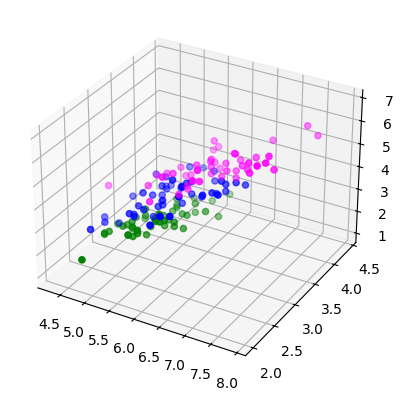

In [6]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show


It is important to work with the same range of the features, because it will affect the results, so we will do some scaling.

<function matplotlib.pyplot.show(close=None, block=None)>

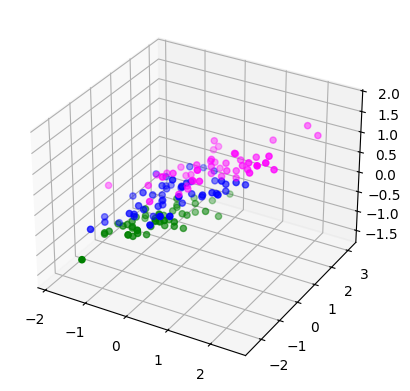

In [9]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)#here we normalise the data with the  zero mean and the standard deviation equal to 1

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show



[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

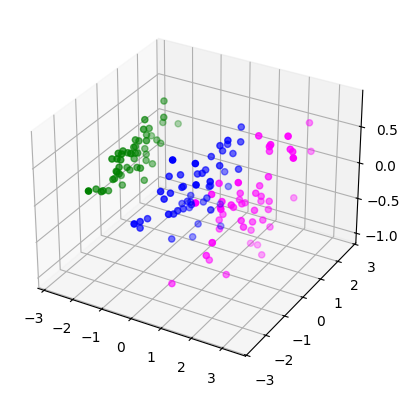

In [23]:
# define PCA object (three components), fit and transform the data
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp) # here we calculate the covarianze matrix and the eigenvalues as well as the eigenvectors
# as Xpp has 4 feature and we have already done some scaling, with the PCA command, we reduce the dimensionality to 3, that is why n_component=3
Xpca = pca.transform(Xpp)#we do a projection of the data in the new basis
print(pca.get_covariance())

#WHY WE DO THIS? Well , we want to reduce the dimensionality of 4D to 3D, getting rid of redundancy and mainteining the most important info
#this will ensure a better visualization of the data and improves the efficiency of the algorithims
axes2 = plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show

In [ ]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

# this command tell us how much info keeps from the original data each component

array([2.93808505, 0.9201649 , 0.14774182])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

As we can see, the first component capture the major part of variability/ or information

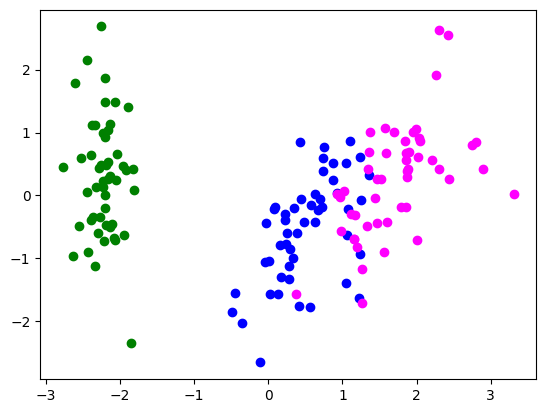

In [18]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')

# KNN classifier

It is an algorithim based on nearest neighbor classification; to classify a new point, we search for the K nearest points in the train data set, and finally we determine the class considering the majority of the neighboors

EXAMPLE; FOR K=3, if the nearest neighbor for one point are [0,0,1], then we will classify this point to belong to the 0 class

(120, 4) (120,)
(30, 4) (30,)


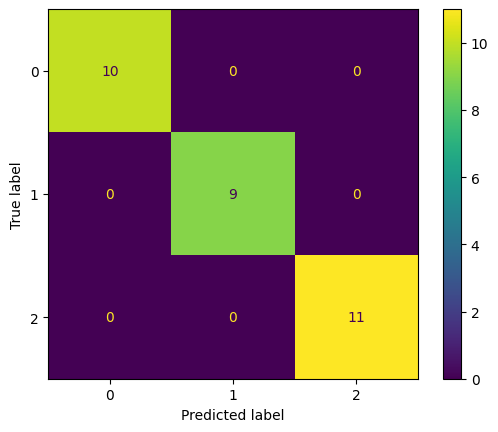

In [20]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)#we will look the 3 nearest neighboors to classify
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

#we have 3 classes 0,1,2 and we have the predicted classes; 0,1,2
#class number 0 has been classified as class number 0 10 times, and
#never class 1 or 2, the same is for class number 1 which has been classfied
#as class number 1 9 times

(120, 3) (120,)
(30, 3) (30,)


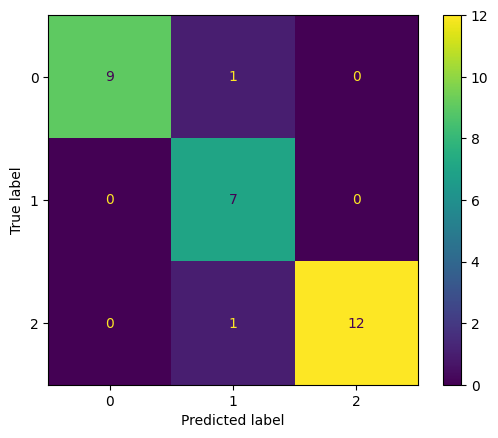

In [27]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

After observing the last tow plots, we can say that PCA reduced the dimensionality of the data without getting worse the data, we can se that only in two cases the algorithym did a bad prediction

(120, 2) (120,)
(30, 2) (30,)


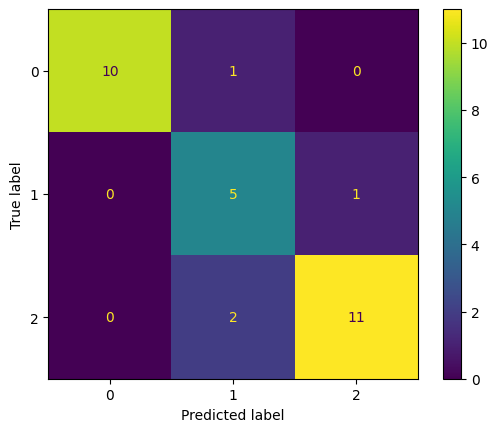

In [25]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset

X_train, X_test, y_train, y_test = train_test_split(Xpca[:,0:2], y, test_size=0.2)#depending de row we choose we will obtain
#different results, maybe more errors if the scaterred plots are closely
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

Now we have tried with PCA data with 2 first components, the graph it is almost the same as the previous one, so we can constate that the third component is not really important

(120, 2) (120,)
(30, 2) (30,)


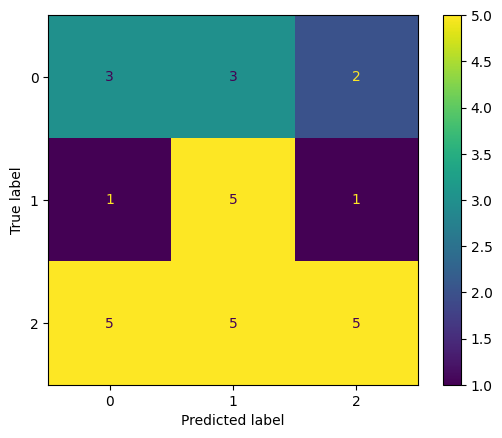

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,1:3], y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

Here as we only takes the second and third components, which are those with less percentage of variance, the algorithym do a lot of bad predictions

(120, 2) (120,)
(30, 2) (30,)


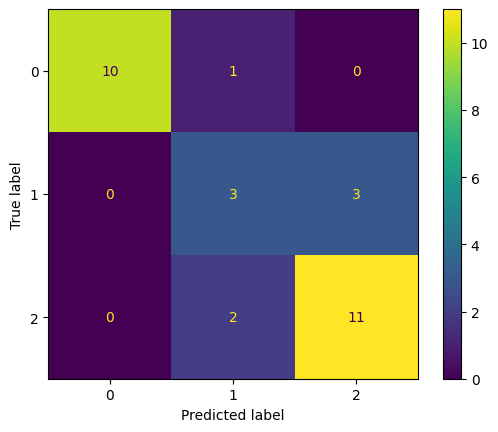

In [26]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

X_train, X_test, y_train, y_test = train_test_split(X[:,0:2], y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

And finally, If we would not have done the scaling and PCA for the data, we had done directly with the original data, the results are not as good as the PCA ones.